In [12]:
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import shlex
import numpy as np
import pandas as pd

In [13]:
def run_simulation_real_data (filein_idx, filein_data, model, ratio):
    
    
    

    command = '../Real_data/Convergence_Readfile/bt_model_data.out ' + filein_idx + ' ' + filein_data + ' ' + str(model) + ' ' + str(ratio) 
#     print(shlex.split(command))

    process = subprocess.Popen(shlex.split(command), stdout=subprocess.PIPE,stderr=subprocess.PIPE)

    
    ##parse output
    output = process.communicate()[0].decode("utf-8")
    R, RL, BIN, BINL = output.split(';;;')

    results = {}
    for label, category_output in zip(['R', 'RL', 'BIN', 'BINL'], [R, RL, BIN, BINL]):
        parsed_data = split_output(category_output.split('\t'))
        results[label] = {
            "std_convergence_criteria": parsed_data[0],
            "log_convergence_criteria": parsed_data[1],
            "rms_convergence_criteria": parsed_data[2],
        }
    
    
    
    return results 


def split_output(convergence_result):
    
    data = [line.split() for line in convergence_result if line.strip()]

    # HOL_like, HO_like = data.pop(-1)

    data_np = np.array(data, dtype=float)
    std_convergence_criteria = data_np[:, 1]  
    log_connvergence_criteria = data_np[:, 2] 
    rms_convergence_criteria = data_np[:, 3] 

    return std_convergence_criteria, log_connvergence_criteria, rms_convergence_criteria


def average_convergence (filein_idx, filein_data, model, ratio, T):
    
    r = []
    rl = []
    bin = []
    binl = []

    for t in range(0, T):
        results_dict = run_simulation_real_data(filein_idx, filein_data, model, ratio)
        r.append(len(results_dict['R']['rms_convergence_criteria']))
        rl.append(len(results_dict['RL']['rms_convergence_criteria']))
        bin.append(len(results_dict['BIN']['rms_convergence_criteria']))
        binl.append(len(results_dict['BINL']['rms_convergence_criteria']))
        
    print("============== Iterations until convergence ==============")
    print(f" Ours- Higher Order: { np.mean(r)}")
    print(f" Zermello- Higher Order: { np.mean(rl)}")
    print(f" Ours- binary: { np.mean(bin)}")
    print(f" Zermello- bin: { np.mean(binl)}")
        

def plot_convergence(convergence_results_dict):
    # Iterate through each category in the dictionary
    for category, data in convergence_results_dict.items():
        plt.figure(figsize=(10, 6))

        plt.plot(data['std_convergence_criteria'], label="Standard Convergence")
        plt.plot(data['log_convergence_criteria'], label="Log Convergence")
        plt.plot(data['rms_convergence_criteria'], label="RMS Convergence")
        
        plt.xlabel("Iterations")
        plt.ylabel("Convergence Criteria")
        plt.title(f"Convergence Criteria for {category}")
        plt.legend(loc="best")
        
        plt.show()

        break




## UCL 

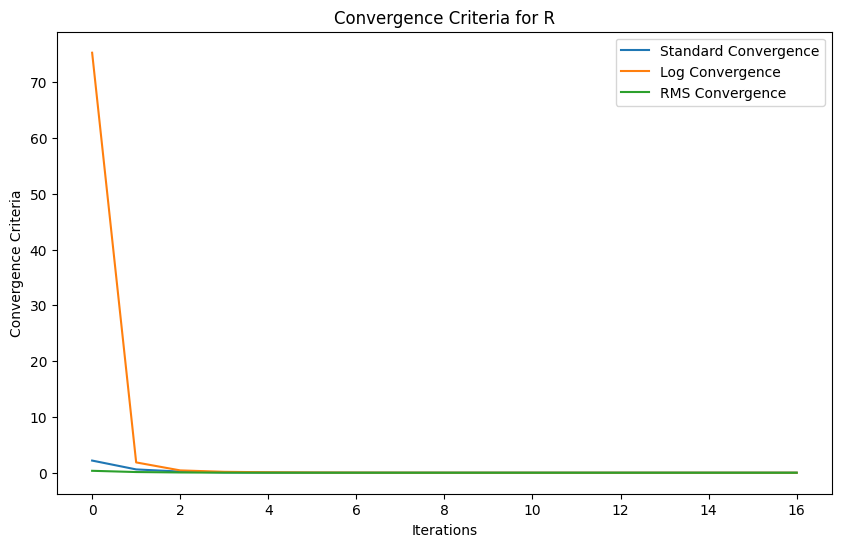

In [14]:
filein_idx = '../Data/00102_idx.txt'
filein_data = '../Data/00102_game.txt'


T = 1000
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)


In [15]:
filein_idx = '../Data/00102_idx.txt'
filein_data = '../Data/00102_game.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 17.302
 Zermello- Higher Order: 61.329
 Ours- binary: 15.484
 Zermello- bin: 123.515


## World Cup Data

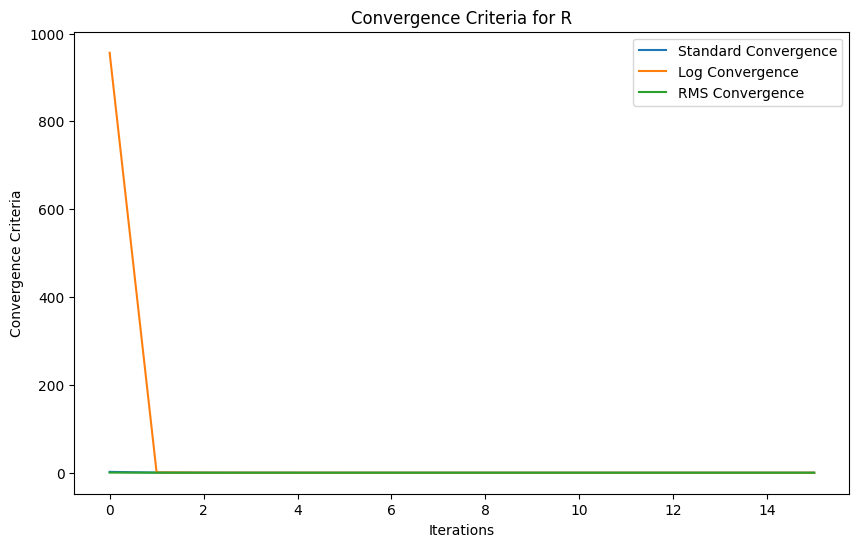

In [16]:
filein_idx = '../Data/00103_idx.txt'
filein_data = '../Data/00103_game.txt'


T = 1000
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [17]:
filein_idx = '../Data/00103_idx.txt'
filein_data = '../Data/00103_game.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 16.138
 Zermello- Higher Order: 52.31
 Ours- binary: 12.871
 Zermello- bin: 88.18


## AGH Course Selection

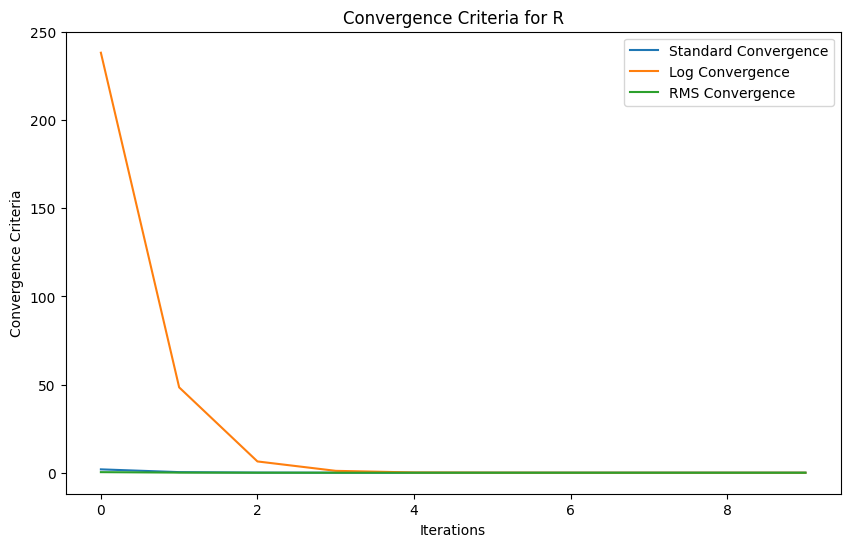

In [18]:
filein_idx = '../Data/00009_idx.txt'
filein_data = '../Data/00009_game.txt'



T = 1
ratio = 0.8
model = 1

data_cl = run_simulation_real_data (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [19]:
filein_idx = '../Data/00009_idx.txt'
filein_data = '../Data/00009_game.txt'

T = 20
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 9.85
 Zermello- Higher Order: 636.15
 Ours- binary: 8.6
 Zermello- bin: 3031.8
